# Modelo Churn

In [11]:
# Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [12]:
# Dados
df = pd.read_csv('data/Churn.csv')
df

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
994,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
995,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
996,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [13]:
df.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [14]:
# Informação básica 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              998 non-null    int64  
 1   Score           998 non-null    int64  
 2   Estado          998 non-null    object 
 3   Genero          998 non-null    object 
 4   Idade           998 non-null    int64  
 5   Patrimonio      998 non-null    int64  
 6   Saldo           998 non-null    int64  
 7   Produtos        998 non-null    int64  
 8   TemCartCredito  998 non-null    int64  
 9   Ativo           998 non-null    int64  
 10  Salario         998 non-null    float64
 11  Saiu            998 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.7+ KB


## Transformando valores categóricos em colunas com valores numéricos

In [15]:
onehotencoderEstado = OneHotEncoder(
    categories='auto', sparse_output=False, dtype='int32'
)
# Aplique a codificação one-hot na coluna 'ocean_proximity'
oheEtd = onehotencoderEstado.fit_transform(df[['Estado']])

# Obtenha os nomes das categorias
categories = onehotencoderEstado.categories_[0]

# Crie os nomes das colunas
column_names = [f"{category}" for category in categories]

# Crie o DataFrame resultante com as colunas codificadas
oheEtd_df = pd.DataFrame(oheEtd, columns=column_names)
oheEtd_df

,PR,RS,SC
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
993,0,0,1
994,0,0,1
995,0,0,1
996,0,0,1


In [16]:
onehotencoderGenero = OneHotEncoder(
    categories='auto', sparse_output=False, dtype='int32'
)
# Aplique a codificação one-hot na coluna 'ocean_proximity'
oheGnr = onehotencoderGenero.fit_transform(df[['Genero']])

# Obtenha os nomes das categorias
categories = onehotencoderGenero.categories_[0]

# Crie os nomes das colunas
column_names = [f"{category}" for category in categories]

# Crie o DataFrame resultante com as colunas codificadas
oheGnr_df = pd.DataFrame(oheGnr, columns=column_names)
oheGnr_df

,Feminino,Masculino
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
993,0,1
994,0,1
995,0,1
996,0,1


In [17]:
# Concatenando os dois data frame em um só
ds = pd.concat([df, oheEtd_df], axis=1)
ds.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu,PR,RS,SC
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1,0,1,0
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0,0,0,1
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1,0,1,0
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0,0,1,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0,0,0,1


In [18]:
df = pd.concat([ds, oheGnr_df], axis=1)
df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu,PR,RS,SC,Feminino,Masculino
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1,0,1,0,1,0
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0,0,0,1,1,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1,0,1,0,1,0
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0,0,1,0,1,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0,0,0,1,1,0


In [19]:
# Eliminado coluna de gênero e estado
df = df.drop(['Estado', 'Genero'], axis=1)
df.head()

,Id,Score,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu,PR,RS,SC,Feminino,Masculino
0,1,619,42,2,0,1,1,1,10134888.0,1,0,1,0,1,0
1,2,608,41,1,8380786,1,0,1,11254258.0,0,0,0,1,1,0
2,3,502,42,8,1596608,3,1,0,11393157.0,1,0,1,0,1,0
3,4,699,39,1,0,2,0,0,9382663.0,0,0,1,0,1,0
4,5,850,43,2,12551082,1,1,1,790841.0,0,0,0,1,1,0


## Plotagem de Dados - Gráficos

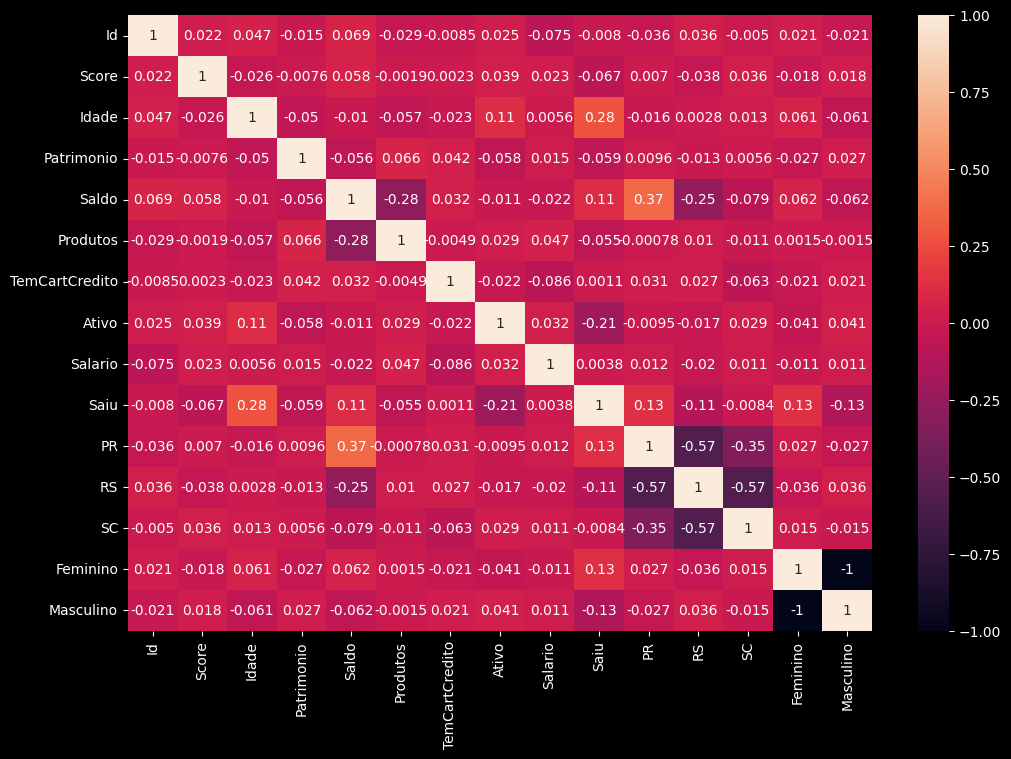

In [20]:
# Mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True);